In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr

In [4]:
from scipy.ndimage import gaussian_filter

In [5]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [7]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [8]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [9]:
np.shape(Vx)

(361, 1536, 1536)

In [10]:
# Our next task is to to average velocities using previously defined function
# We shall use the first half of total slices for that

# 360 = full
# 180 = 30 min
# 90 = 15 min
# 60 = 10 min
Vx_mean_sim60 = temporal_avg(Vx, 0, 60)
Vx_mean_sim60 = Vx_mean_sim60/1E5

Vy_mean_sim60 = temporal_avg(Vy, 0, 60)
Vy_mean_sim60 = Vy_mean_sim60/1E5

In [11]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 60)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 60)

In [12]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 60)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 60)

In [13]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim60, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim60, 22.5, mode = "wrap")

In [14]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim60, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim60, 11.25, mode = "wrap")

In [15]:
r_600_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_1)

PearsonRResult(statistic=0.5616806448613422, pvalue=0.0)


In [16]:
r_600_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim60.flatten())
print(r_600_2)

PearsonRResult(statistic=0.7915810596653666, pvalue=0.0)


In [17]:
r_600_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_3)

PearsonRResult(statistic=0.9234203662843522, pvalue=0.0)


In [18]:
r_600_y1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y1)

PearsonRResult(statistic=0.5505031119634196, pvalue=0.0)


In [19]:
r_600_y2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim60.flatten())
print(r_600_y2)

PearsonRResult(statistic=0.7827179790741866, pvalue=0.0)


In [20]:
r_600_y3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y3)

PearsonRResult(statistic=0.9168844129272529, pvalue=0.0)


In [21]:
Vx_mean_sim30 = temporal_avg(Vx, 0, 30)
Vx_mean_sim30 = Vx_mean_sim30/1E5

Vy_mean_sim30 = temporal_avg(Vy, 0, 30)
Vy_mean_sim30 = Vy_mean_sim30/1E5

In [22]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 30)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 30)

In [23]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 30)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 30)

In [24]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim30, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim30, 22.5, mode = "wrap")

In [25]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim30, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim30, 11.25, mode = "wrap")

In [26]:
r_600_30_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_30_1)

PearsonRResult(statistic=0.5616806448613422, pvalue=0.0)


In [27]:
r_600_30_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim30.flatten())
print(r_600_30_2)

PearsonRResult(statistic=0.7450690826180195, pvalue=0.0)


In [28]:
r_600_30_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_30_3)

PearsonRResult(statistic=0.897523410894962, pvalue=0.0)


In [29]:
r_600_y30_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y30_1)

PearsonRResult(statistic=0.5505031119634196, pvalue=0.0)


In [30]:
r_600_y30_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim30.flatten())
print(r_600_y30_2)

PearsonRResult(statistic=0.7279734420621307, pvalue=0.0)


In [31]:
r_600_y30_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y30_3)

PearsonRResult(statistic=0.8852904161425086, pvalue=0.0)


In [32]:
r_300_30_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_30_1)

PearsonRResult(statistic=0.5134004470982599, pvalue=0.0)


In [33]:
r_300_30_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim30.flatten())
print(r_300_30_2)

PearsonRResult(statistic=0.7576622661036828, pvalue=0.0)


In [34]:
r_300_30_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_30_3)

PearsonRResult(statistic=0.8572473479163005, pvalue=0.0)


In [35]:
r_300_y30_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y30_1)

PearsonRResult(statistic=0.5069102343954233, pvalue=0.0)


In [36]:
r_300_y30_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim30.flatten())
print(r_300_y30_2)

PearsonRResult(statistic=0.7376849756585381, pvalue=0.0)


In [37]:
r_300_y30_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y30_3)

PearsonRResult(statistic=0.8410567593570607, pvalue=0.0)


In [38]:
Vx_mean_sim18 = temporal_avg(Vx, 0, 18)
Vx_mean_sim18 = Vx_mean_sim18/1E5

Vy_mean_sim18 = temporal_avg(Vy, 0, 18)
Vy_mean_sim18 = Vy_mean_sim18/1E5

In [39]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 18)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 18)

In [40]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 18)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 18)

In [41]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim18, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim18, 22.5, mode = "wrap")

In [42]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim18, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim18, 11.25, mode = "wrap")

In [43]:
r_600_18_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_18_1)

PearsonRResult(statistic=0.5616806448613422, pvalue=0.0)


In [44]:
r_600_18_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim18.flatten())
print(r_600_18_2)

PearsonRResult(statistic=0.7064908801257157, pvalue=0.0)


In [45]:
r_600_18_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_18_3)

PearsonRResult(statistic=0.878356063766234, pvalue=0.0)


In [46]:
r_600_y18_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y18_1)

PearsonRResult(statistic=0.5505031119634196, pvalue=0.0)


In [47]:
r_600_y18_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim18.flatten())
print(r_600_y18_2)

PearsonRResult(statistic=0.691252441410855, pvalue=0.0)


In [48]:
r_600_y18_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y18_3)

PearsonRResult(statistic=0.8649143025368917, pvalue=0.0)


In [49]:
r_300_18_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_18_1)

PearsonRResult(statistic=0.5134004470982599, pvalue=0.0)


In [50]:
r_300_18_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim18.flatten())
print(r_300_18_2)

PearsonRResult(statistic=0.7118272940826932, pvalue=0.0)


In [51]:
r_300_18_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_18_3)

PearsonRResult(statistic=0.8232036797578435, pvalue=0.0)


In [52]:
r_300_y18_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y18_1)

PearsonRResult(statistic=0.5069102343954233, pvalue=0.0)


In [53]:
r_300_y18_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim18.flatten())
print(r_300_y18_2)

PearsonRResult(statistic=0.6949926151815398, pvalue=0.0)


In [54]:
r_300_y18_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y18_3)

PearsonRResult(statistic=0.8063184809959397, pvalue=0.0)


In [55]:
# Form a table that contains values for all time values

<h2>Paper plots</h2>

In [56]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [57]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [58]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [59]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [60]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [61]:
from scipy.stats import linregress

/tmp/ipykernel_36246/2586531545.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_36246/2586531545.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')
/home/mistflow/anaconda3/envs/flct/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


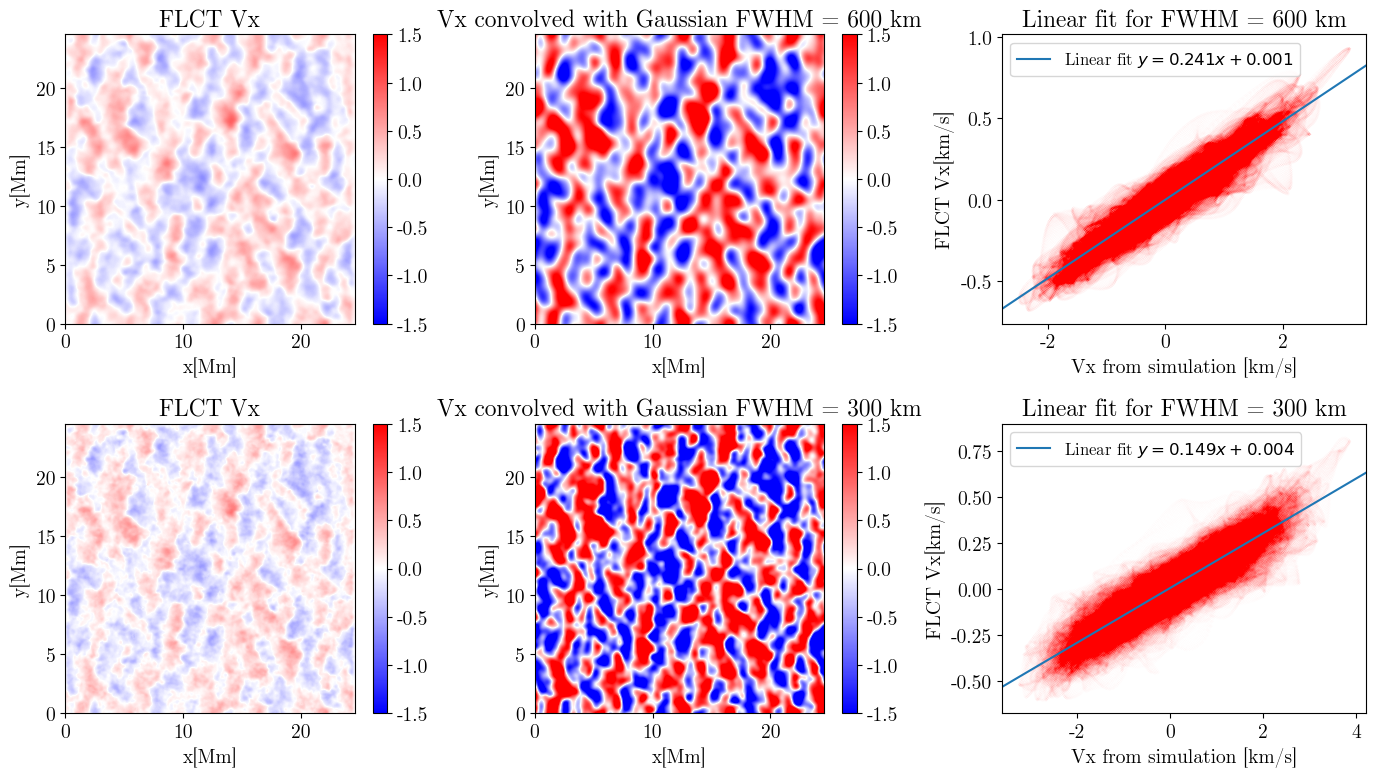

In [62]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx_filtered22.flatten(), Vx_FLCT_600.flatten(), s = 0.001, alpha = 0.05, color="red")
m1, b1, *_ = linregress(Vx_filtered22.flatten(), Vx_FLCT_600.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
plt.legend(fontsize = 12)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_FLCT_300[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Vx convolved with Gaussian FWHM = 300 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Linear fit for FWHM = 300 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vx_filtered11.flatten(), Vx_FLCT_300.flatten(), s = 0.001, alpha = 0.05, color="red")
m2, b2, *_ = linregress(Vx_filtered11.flatten(), Vx_FLCT_300.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend(fontsize = 12)



plt.tight_layout()
plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')

In [63]:
first = np.fromfile("tau_slice_1.000.000000", dtype = "float32")
first_ = first[4:].reshape(11, 1536, 1536)
Bz_1 = first_[7,:,:]
Bz_1 = Bz_1 * np.sqrt(4*np.pi)

In [64]:
V_z_sim = first_[1,:,:]
V_y_sim = first_[3,:,:]
V_x_sim = first_[2,:,:]
T = first_[8,:,:]

In [65]:
from matplotlib import cm
from matplotlib.colors import Normalize

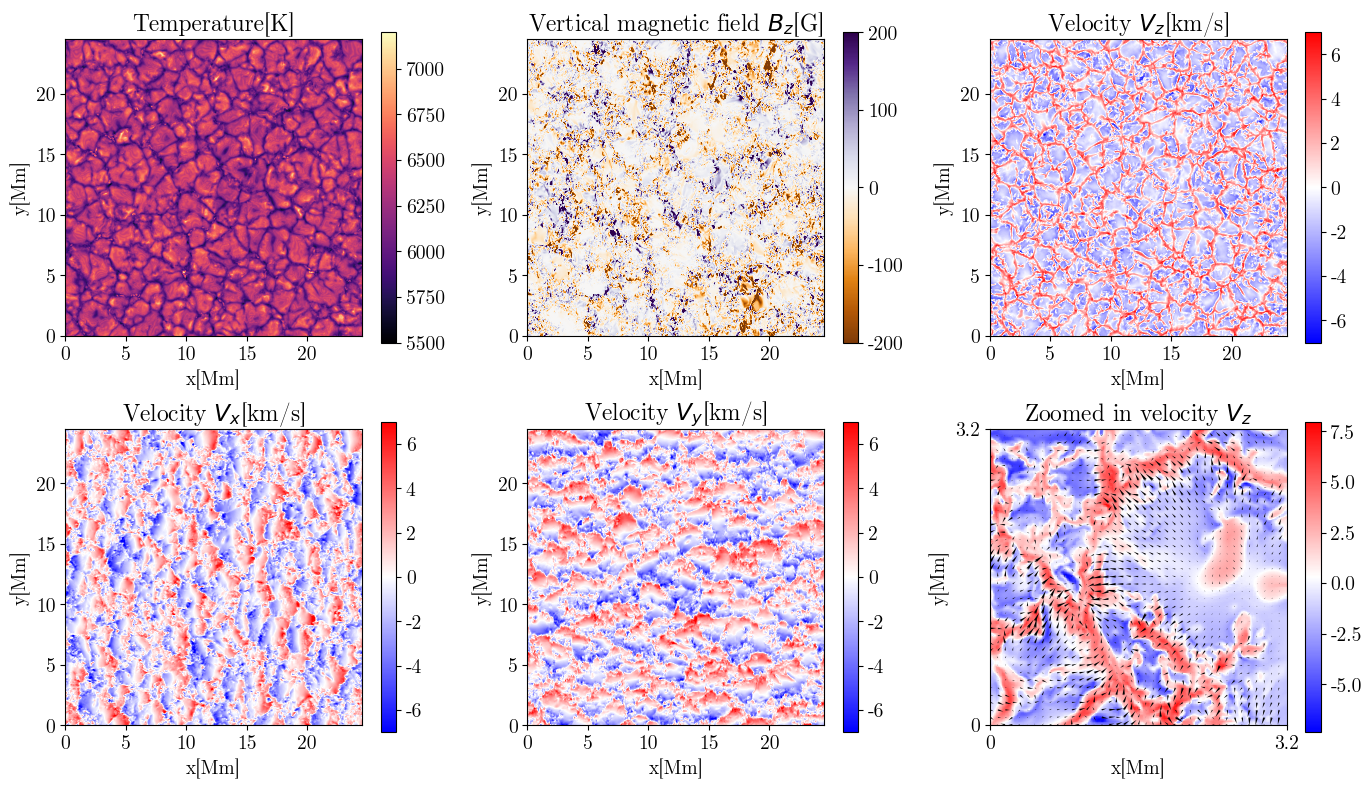

In [66]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("Temperature[K]")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(T[:, :], origin='lower', cmap = "magma", extent = (0, 24.536, 0, 24.536), vmin = 5500, vmax = 7200)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vertical magnetic field $B_z$[G]")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Bz_1[:, :], origin='lower', cmap = "PuOr", extent = (0, 24.536, 0, 24.536),vmin = -200, vmax = 200)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Velocity $V_z$[km/s]")                                
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
im3 = ax3.imshow(-V_z_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im3)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("Velocity $V_x$[km/s]")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(V_x_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Velocity $V_y$[km/s]")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(V_y_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Zoomed in velocity $V_z$")
ax6.set_xlabel("x[Mm]")
ax6.set_ylabel("y[Mm]")                             
xmin = 0
xmax = 200
ymin = 0
ymax=  200

Bgtx_disp = V_x_sim[ymin:ymax,xmin:xmax]/1E5
Bgty_disp = V_y_sim[ymin:ymax,xmin:xmax]/1E5
Bgtz_disp = V_z_sim[ymin:ymax,xmin:xmax]/1E5

ysize,xsize = np.shape(Bgtx_disp)

stride = 5


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))

xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im6 = ax6.imshow(-Bgtz_disp, origin='lower',cmap='bwr')
ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 4, headaxislength = 12, headlength = 14)
#ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride])
plt.xticks([0,200], [0, 2*1.6])
plt.yticks([0,200], [0, 2*1.6])
#norm = Normalize(vmin=(-0.6)*1e6, vmax = 0.6*1e6)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap="bwr"), ax = ax6)
plt.colorbar(im6)



plt.tight_layout()
plt.savefig("Simulation_para.png", dpi = 80, bbox_inches = 'tight')

In [67]:
print(V_x_sim/1E5)

[[1.9820384 1.9392114 1.4349072 ... 2.4149725 2.2777548 2.19201  ]
 [2.1276762 1.9948179 1.851506  ... 2.3879929 2.3675025 2.3359892]
 [2.3292916 2.1158216 2.111543  ... 2.2668633 2.3766482 2.362528 ]
 ...
 [1.2814795 0.8281635 0.4775422 ... 2.2872279 2.0980136 1.6468141]
 [1.7232206 1.3365542 0.8931396 ... 2.2000778 2.1020577 1.7868352]
 [1.7848111 1.7380409 1.0780907 ... 2.2899635 2.0827088 1.9643098]]


In [68]:
print(Vx_filtered22)

[[0.9995838  0.96013904 0.91983896 ... 1.1112638  1.0752923  1.038018  ]
 [1.014392   0.9749845  0.9347041  ... 1.1258625  1.0899763  1.0527722 ]
 [1.0288554  0.9894832  0.9492204  ... 1.1401231  1.1043198  1.0671836 ]
 ...
 [0.95336294 0.91379154 0.87341744 ... 1.0657145  1.0294732  0.9919741 ]
 [0.96904075 0.9295142  0.88916755 ... 1.0811609  1.045012   1.0075904 ]
 [0.98445743 0.94497305 0.904651   ... 1.0963539  1.0602949  1.0229481 ]]


<h2>23. 11. 2024.</h2>

In [69]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [70]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [71]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [72]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [73]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [74]:
r_600_30_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_30_1)

PearsonRResult(statistic=0.5616806448613422, pvalue=0.0)


In [75]:
r_600_30_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim90.flatten())
print(r_600_30_2)

PearsonRResult(statistic=0.8173243422065642, pvalue=0.0)


In [76]:
r_600_30_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_30_3)

PearsonRResult(statistic=0.9375096284141715, pvalue=0.0)


In [77]:
r_600_y30_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y30_1)

PearsonRResult(statistic=0.5505031119634196, pvalue=0.0)


In [78]:
r_600_y30_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim90.flatten())
print(r_600_y30_2)

PearsonRResult(statistic=0.8121617562084135, pvalue=0.0)


In [79]:
r_600_y30_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y30_3)

PearsonRResult(statistic=0.9325966781440204, pvalue=0.0)


In [80]:
r_300_30_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_30_1)

PearsonRResult(statistic=0.5134004470982599, pvalue=0.0)


In [81]:
r_300_30_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim90.flatten())
print(r_300_30_2)

PearsonRResult(statistic=0.832532598494514, pvalue=0.0)


In [82]:
r_300_30_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_30_3)

PearsonRResult(statistic=0.9157437254596412, pvalue=0.0)


In [83]:
r_300_y30_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y30_1)

PearsonRResult(statistic=0.5069102343954233, pvalue=0.0)


In [84]:
r_300_y30_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim90.flatten())
print(r_300_y30_2)

PearsonRResult(statistic=0.8303131334190189, pvalue=0.0)


In [85]:
r_300_y30_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y30_3)

PearsonRResult(statistic=0.912506245211913, pvalue=0.0)


<h2>24. 01. 2025</h2>

In [86]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h2>Cadence = 10 s, dt = 10 s, Intensity tracked</h2>

In [87]:
Vx_600I = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")[0].data
Vy_600I = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")[1].data

In [88]:
Vx_300I = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")[0].data
Vy_300I = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")[1].data

In [89]:
#Vx_600I_mean = temporal_avg(Vx_600I, 0, 90)
#Vy_600I_mean = temporal_avg(Vy_600I, 0, 90)
Vx_600I_mean = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")
Vy_600I_mean = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")

In [90]:
#Vx_300I_mean = temporal_avg(Vx_300I, 0, 90)
#Vy_300I_mean = temporal_avg(Vy_300I, 0, 90)
Vx_300I_mean = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")
Vy_300I_mean = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")

In [91]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density
from scipy.stats import gaussian_kde
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [92]:
#xy = np.vstack([Vx_filtered22.flatten(), Vx_600I_mean.flatten()])
#gk = gaussian_kde(xy)(xy)

In [93]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    plt.scatter( x, y, c=z, cmap = "viridis", **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax




CPU times: user 5.67 s, sys: 887 ms, total: 6.56 s
Wall time: 8.51 s


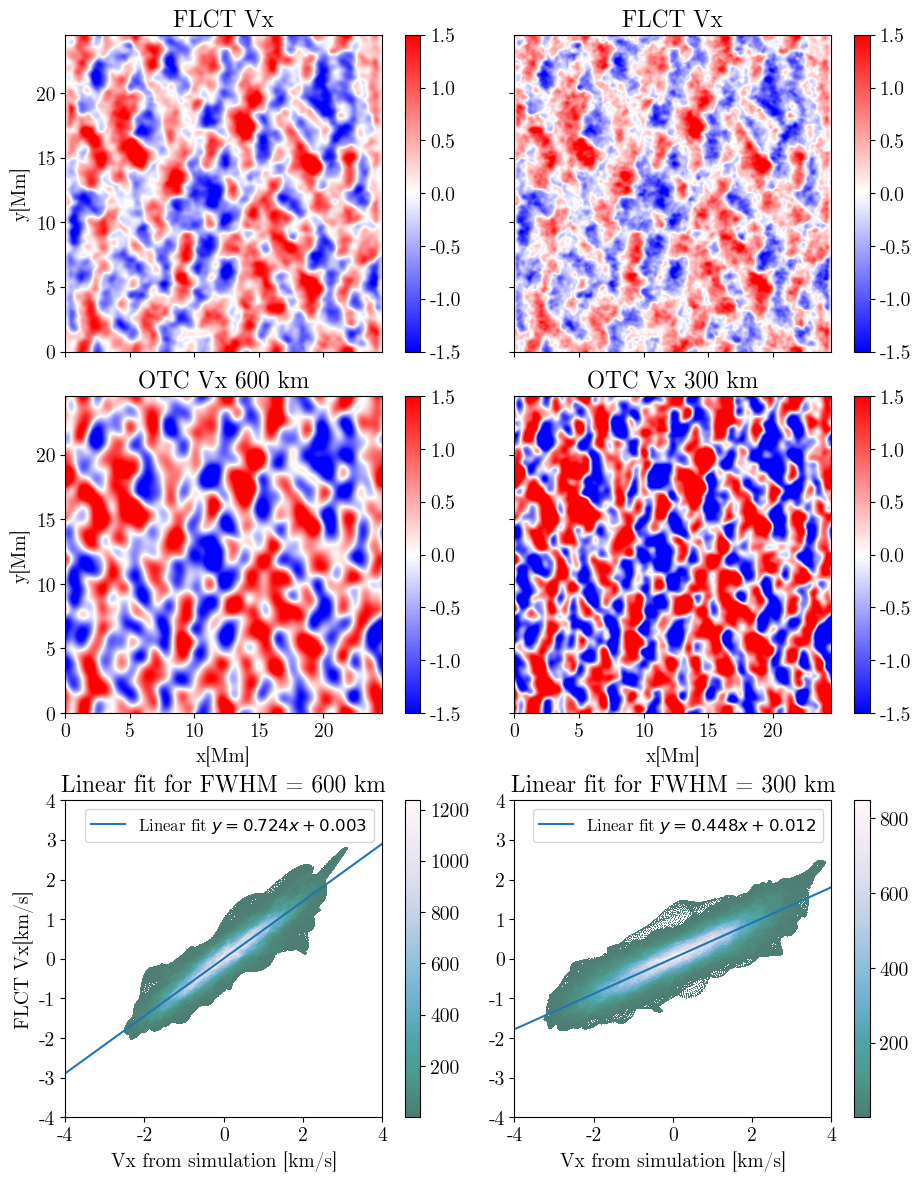

In [94]:
%%time
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig = plt.figure(constrained_layout=True, figsize = (9,11.7))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = fig.add_subplot(321)
ax1.set_title("FLCT Vx")
#ax1.set_xlabel("x[Mm]")
ax1.set_xticklabels([])
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_600I_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = fig.add_subplot(323)
ax2.set_title("OTC Vx 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = fig.add_subplot(325)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")

data , x_e, y_e = np.histogram2d( Vx_filtered22.flatten(), Vx_600I_mean.flatten(), bins = 30, density = True )
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([Vx_filtered22.flatten(),Vx_600I_mean.flatten()]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

df = pd.DataFrame(dict(x = Vx_filtered22.flatten(), y = Vx_600I_mean.flatten()))
dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="equal",
        ax=ax3,
        cmap = "PuBuGn_r",
        x_range = (-4,4),
        y_range = (-4,4)
    )

#im3 = ax3.scatter(Vx_filtered22.flatten(), Vx_600I_mean.flatten(), c = 0.73*Vx_600I_mean.flatten(), s = 0.001, alpha = 0.05, cmap = "twilight")
m1I, b1I, *_ = linregress(Vx_filtered22.flatten(), Vx_600I_mean.flatten())
ax3.axline(xy1=(0, b1I), slope=m1I, label=f'Linear fit $y = {m1I:.3f}x {b1I:+.3f}$')
#norm = Normalize(vmin = np.min(z), vmax = np.max(z))
#cbar = plt.colorbar(im3, cm.ScalarMappable(norm = norm),)
#ax3.set_xlim([-4, 4])
#ax3.set_ylim([-4, 4])
plt.colorbar(dsartist)
plt.legend(fontsize = 12)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = fig.add_subplot(322)
ax4.set_title("FLCT Vx")
#ax4.set_xlabel("x[Mm]")
#ax4.set_ylabel("y[Mm]")
ax4.set_xticklabels([])
ax4.set_yticklabels([])
im4 = ax4.imshow(Vx_300I_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = fig.add_subplot(324)
ax5.set_title("OTC Vx 300 km")
ax5.set_xlabel("x[Mm]")
#ax5.set_ylabel("y[Mm]")
ax5.set_yticklabels([])
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = fig.add_subplot(326)
ax6.set_title("Linear fit for FWHM = 300 km")                                
#ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")


df1 = pd.DataFrame(dict(x = Vx_filtered11.flatten(), y = Vx_300I_mean.flatten()))
dsartist1 = dsshow(
        df1,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="equal",
        ax=ax6,
        cmap = "PuBuGn_r"
        #cmap = "inferno"
    )

#im6 = ax6.scatter(Vx_filtered11.flatten(), Vx_300I_mean.flatten(), c = 0.45*Vx_filtered11.flatten(), s = 0.001, alpha = 0.3, cmap='PuBuGn')
m2I, b2I, *_ = linregress(Vx_filtered11.flatten(), Vx_300I_mean.flatten())
ax6.axline(xy1=(0, b2I), slope=m2I, label=f'Linear fit $y = {m2I:.3f}x {b2I:+.3f}$')
ax6.set_xlim([-4, 4])
ax6.set_ylim([-4, 4])
plt.colorbar(dsartist1)
plt.legend(fontsize = 12)

#cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
#cbar = fig.colorbar(im, cax=cbar_ax)
#cbar.set_label('$V_x$ [km/s]')


#plt.tight_layout()
plt.savefig("300_600Inte_comp.png", dpi = 100, bbox_inches = 'tight')


In [95]:
print(Vx_filtered22.flatten())

[0.9995838  0.96013904 0.91983896 ... 1.0963539  1.0602949  1.0229481 ]


In [96]:
print(np.min(Vx_filtered22.flatten()))
print(np.max(Vx_filtered22.flatten()))

-2.495771
3.1285064


<h3>Correlation</h3>

<h3>600 km</h3>

In [97]:
R_600xInte1 = pearsonr(Vx_600I[0].flatten(), Vx[0].flatten())
print(R_600xInte1)

PearsonRResult(statistic=0.5616806448613422, pvalue=0.0)


In [98]:
R_600yInte1 = pearsonr(Vy_600I[0].flatten(), Vy[0].flatten())
print(R_600yInte1)

PearsonRResult(statistic=0.5505031119634197, pvalue=0.0)


In [99]:
R_600xInte2 = pearsonr(Vx_600I_mean.flatten(), Vx_mean_sim90.flatten())
print(R_600xInte2)

PearsonRResult(statistic=0.8174669154310051, pvalue=0.0)


In [100]:
R_600yInte2 = pearsonr(Vy_600I_mean.flatten(), Vy_mean_sim90.flatten())
print(R_600yInte2)

PearsonRResult(statistic=0.8124652230781947, pvalue=0.0)


In [101]:
R_600xInte = pearsonr(Vx_600I_mean.flatten(), Vx_filtered22.flatten())
print(R_600xInte)

PearsonRResult(statistic=0.9374428154657202, pvalue=0.0)


In [102]:
R_600yInte = pearsonr(Vy_600I_mean.flatten(), Vy_filtered22.flatten())
print(R_600xInte)

PearsonRResult(statistic=0.9374428154657202, pvalue=0.0)


<h3>300 km</h3>

In [103]:
R_300xInte1 = pearsonr(Vx_300I[0].flatten(), Vx[0].flatten())
print(R_300xInte1)

PearsonRResult(statistic=0.5134004470982598, pvalue=0.0)


In [104]:
R_300yInte1 = pearsonr(Vy_300I[0].flatten(), Vy[0].flatten())
print(R_300yInte1)

PearsonRResult(statistic=0.5069102343954233, pvalue=0.0)


In [105]:
R_300xInte2 = pearsonr(Vx_300I_mean.flatten(), Vx_mean_sim90.flatten())
print(R_300xInte2)

PearsonRResult(statistic=0.8327186764847766, pvalue=0.0)


In [106]:
R_300yInte2 = pearsonr(Vy_300I_mean.flatten(), Vy_mean_sim90.flatten())
print(R_300yInte2)

PearsonRResult(statistic=0.8306643274303978, pvalue=0.0)


In [107]:
R_300xInte = pearsonr(Vx_300I_mean.flatten(), Vx_filtered11.flatten())
print(R_300xInte)

PearsonRResult(statistic=0.8993547162103889, pvalue=0.0)


In [108]:
R_300yInte = pearsonr(Vy_300I_mean.flatten(), Vy_filtered11.flatten())
print(R_300xInte)

PearsonRResult(statistic=0.8993547162103889, pvalue=0.0)


<h2>Cadence = 10 s, dt = 10 s, $B_z$ tracked</h2>

In [109]:
Vx_600B = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")[0].data
Vy_600B = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")[1].data

In [110]:
Vx_300B = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")[0].data
Vy_300B = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")[1].data

In [111]:
Vx_600B_mean = temporal_avg(Vx_600B, 0, 90)
Vy_600B_mean = temporal_avg(Vy_600B, 0, 90)
Vx_600B_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")
Vy_600B_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")

In [112]:
Vx_300B_mean = temporal_avg(Vx_300B, 0, 90)
Vy_300B_mean = temporal_avg(Vy_300B, 0, 90)
Vx_300B_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")
Vy_300B_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")

CPU times: user 3.07 s, sys: 228 ms, total: 3.3 s
Wall time: 3.31 s


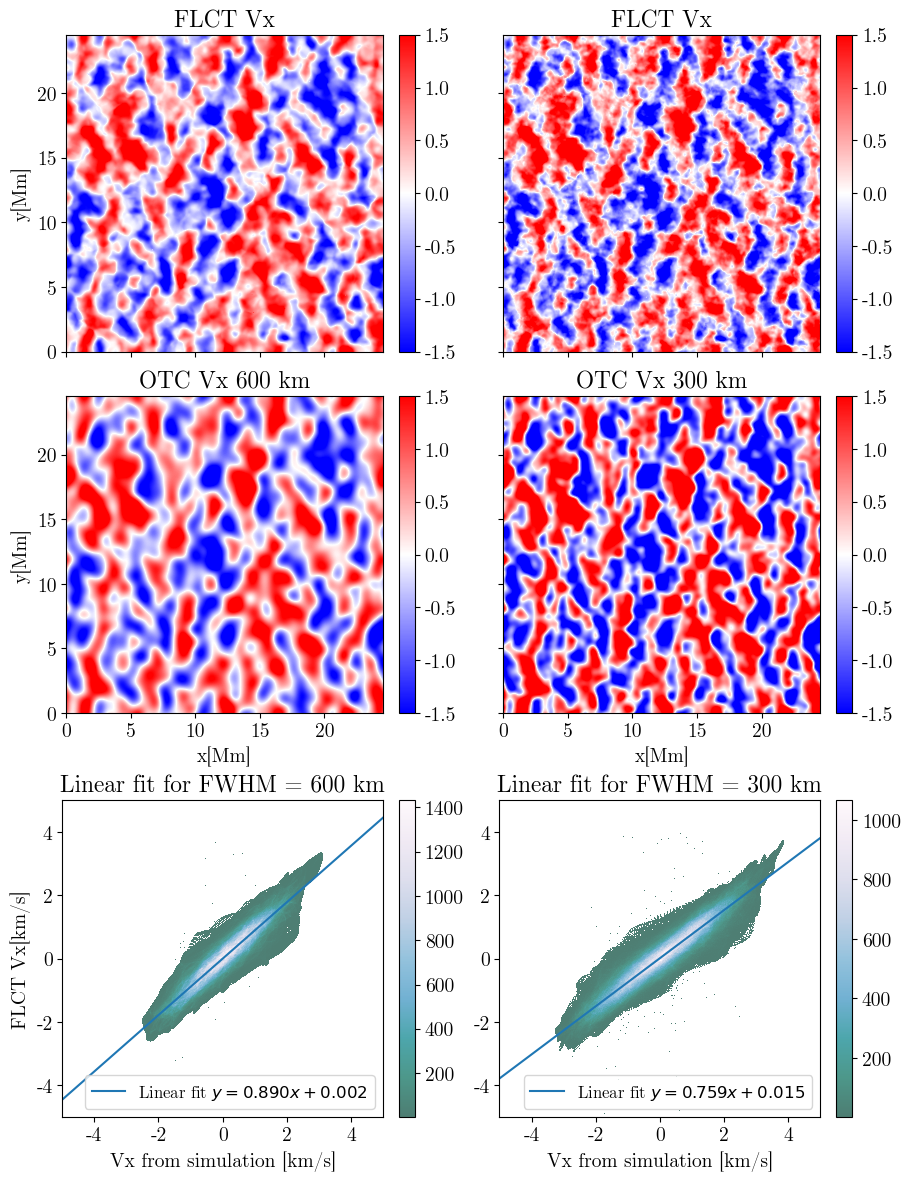

In [113]:
%%time
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(constrained_layout=True, figsize = (9,11.7))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(321)
ax1.set_title("FLCT Vx")
#ax1.set_xlabel("x[Mm]")
ax1.set_xticklabels([])
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_600B_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(323)
ax2.set_title("OTC Vx 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(325)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")

df3 = pd.DataFrame(dict(x = Vx_filtered22.flatten(), y = Vx_600B_cor.flatten()))
dsartist3 = dsshow(
        df3,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="auto",
        ax=ax3,
        cmap = "PuBuGn_r",
        #plot_width = 700,
        #plot_height = 700
    )

ax3.set_xlim([-5, 5])
ax3.set_ylim([-5, 5])
#ax3.scatter(Vx_filtered22.flatten(), Vx_600B_cor.flatten(), alpha = 0.05, color="red")
m1B, b1B, *_ = linregress(Vx_filtered22.flatten(), Vx_600B_cor.flatten())
ax3.axline(xy1=(0, b1B), slope=m1B, label=f'Linear fit $y = {m1B:.3f}x {b1B:+.3f}$')
plt.colorbar(dsartist3)
plt.legend(fontsize = 12, loc = "lower right")

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(322)
ax4.set_title("FLCT Vx")
#ax4.set_xlabel("x[Mm]")
#ax4.set_ylabel("y[Mm]")
ax4.set_xticklabels([])
ax4.set_yticklabels([])
im4 = ax4.imshow(Vx_300B_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(324)
ax5.set_title("OTC Vx 300 km")
ax5.set_xlabel("x[Mm]")
#ax5.set_ylabel("y[Mm]")
ax5.set_yticklabels([])
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(326)
ax6.set_title("Linear fit for FWHM = 300 km")                                
#ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.set_xlim([-2, 2])
ax6.set_ylim([-8, 8])
#ax6.scatter(Vx_filtered11.flatten(), Vx_300B_cor.flatten(), s = 2, alpha = 0.05, color="red")

df4 = pd.DataFrame(dict(x = Vx_filtered11.flatten(), y = Vx_300B_cor.flatten()))

dsartist4 = dsshow(
        df4,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="auto",
        ax=ax6,
        cmap = "PuBuGn_r",
        #plot_width = 700,
        #plot_height = 700,
        x_range = (-5,5),
        y_range = (-5,5)
    )



m2B, b2B, *_ = linregress(Vx_filtered11.flatten(), Vx_300B_cor.flatten())
ax6.axline(xy1=(0, b2B), slope=m2B, label=f'Linear fit $y = {m2B:.3f}x {b2B:+.3f}$')
plt.colorbar(dsartist4)
plt.legend(fontsize = 12, loc = "lower right")
'''
axins = inset_axes(ax4,
                    width="5%",  
                    height="200%",
                    loc='center right',
                    borderpad=-5
                   )

#cbar_ax = f.add_axes([0.975, 0.15, 0.02, 0.7])
cbar = f.colorbar(im1, cax = axins, location = "top")
cbar.set_label('$V_x$ [km/s]')
'''
#plt.tight_layout()
plt.savefig("300_600Bz_comp.png", dpi = 100, bbox_inches = 'tight')

<h3>Correlation</h3>

<h3>600 km</h3>

In [114]:
R_600xBz1 = pearsonr(Vx_600B[0].flatten(), Vx[0].flatten())
print(R_600xBz1)

PearsonRResult(statistic=0.6082901259948335, pvalue=0.0)


In [115]:
R_600yBz1 = pearsonr(Vy_600B[0].flatten(), Vy[0].flatten())
print(R_600yBz1)

PearsonRResult(statistic=0.5838979716099791, pvalue=0.0)


In [116]:
R_600xBz2 = pearsonr(Vx_600B_mean.flatten(), Vx_mean_sim90.flatten())
print(R_600xBz2)

PearsonRResult(statistic=0.8265627718777794, pvalue=0.0)


In [117]:
R_600yBz2 = pearsonr(Vy_600B_mean.flatten(), Vy_mean_sim90.flatten())
print(R_600yBz2)

PearsonRResult(statistic=0.8292545115257934, pvalue=0.0)


In [118]:
R_600xBz = pearsonr(Vx_600B_mean.flatten(), Vx_filtered22.flatten())
print(R_600xBz)

PearsonRResult(statistic=0.9344542432952909, pvalue=0.0)


In [119]:
R_600yBz = pearsonr(Vy_600B_mean.flatten(), Vy_filtered22.flatten())
print(R_600yBz)

PearsonRResult(statistic=0.9340294483907491, pvalue=0.0)


<h3 style="color:red">!!!Corrected!!!</h3>

In [120]:
R_600xBz2c = pearsonr(Vx_600B_cor.flatten(), Vx_mean_sim90.flatten())
print(R_600xBz2c)
R_600yBz2c = pearsonr(Vy_600B_cor.flatten(), Vy_mean_sim90.flatten())
print(R_600yBz2c)

PearsonRResult(statistic=0.831049458780652, pvalue=0.0)
PearsonRResult(statistic=0.8310604263109082, pvalue=0.0)


In [121]:
R_600xBzc = pearsonr(Vx_600B_cor.flatten(), Vx_filtered22.flatten())
print(R_600xBzc)
R_600yBzc = pearsonr(Vy_600B_cor.flatten(), Vy_filtered22.flatten())
print(R_600yBzc)

PearsonRResult(statistic=0.9394378598951825, pvalue=0.0)
PearsonRResult(statistic=0.9356584550148547, pvalue=0.0)


<h3>300 km</h3

In [122]:
R_300xBz1 = pearsonr(Vx_300B[0].flatten(), Vx[0].flatten())
print(R_300xBz1)

PearsonRResult(statistic=0.6729079730485094, pvalue=0.0)


In [123]:
R_300yBz1 = pearsonr(Vy_300B[0].flatten(), Vy[0].flatten())
print(R_300yBz1)

PearsonRResult(statistic=0.6383922448733466, pvalue=0.0)


In [124]:
R_300xBz2 = pearsonr(Vx_300B_mean.flatten(), Vx_mean_sim90.flatten())
print(R_300xBz2)

PearsonRResult(statistic=0.3296859974451231, pvalue=0.0)


In [125]:
R_300yBz2 = pearsonr(Vy_300B_mean.flatten(), Vy_mean_sim90.flatten())
print(R_300yBz2)

PearsonRResult(statistic=0.5276901197174959, pvalue=0.0)


In [126]:
R_300xBz = pearsonr(Vx_300B_mean.flatten(), Vx_filtered11.flatten())
print(R_300xBz)

PearsonRResult(statistic=0.3469200279192363, pvalue=0.0)


In [127]:
R_300yBz = pearsonr(Vy_300B_mean.flatten(), Vy_filtered11.flatten())
print(R_300yBz)

PearsonRResult(statistic=0.5558827137462382, pvalue=0.0)


<h3 style="color:red">!!!Corrected!!!</h3>

In [128]:
R_300xBz2c = pearsonr(Vx_300B_cor.flatten(), Vx_mean_sim90.flatten())
print(R_300xBz2c)
R_300yBz2c = pearsonr(Vy_300B_cor.flatten(), Vy_mean_sim90.flatten())
print(R_300yBz2c)

PearsonRResult(statistic=0.9000459937338028, pvalue=0.0)
PearsonRResult(statistic=0.900272898509935, pvalue=0.0)


In [129]:
R_300xBzc = pearsonr(Vx_300B_cor.flatten(), Vx_filtered22.flatten())
print(R_300xBzc)
R_300yBzc = pearsonr(Vy_300B_cor.flatten(), Vy_filtered22.flatten())
print(R_300yBzc)

PearsonRResult(statistic=0.9307589070324968, pvalue=0.0)
PearsonRResult(statistic=0.9276943822748374, pvalue=0.0)


<h1>New statistics</h1>

<h2>27. 03. 2025.</h2>

<h3>Inner product</h3>

In [130]:
# Define Cauchy-Schwartz inequality-based test C_{CS} in (Schrijver et al., 2006).
def cauchy_schwartz_inequality(X, Y):
    #x = np.random.randint(1, 100, 10)
    #y = np.random.randint(1, 100, 10)
    
    #inner_prod = np.inner(x, y)
    
    #inner_prod = lambda X, Y: sum(map(lambda x, y: x * y, X, Y))

    inner_prod = np.dot(np.array(X)[:], Y)
    
    #right = np.sqrt(np.sum(np.power(x, 2))) * np.sqrt(np.sum(np.power(y, 2)))
    
    return inner_prod

<h3>CS for Intensity tracking</h3>

In [131]:
CS_I600 = cauchy_schwartz_inequality(Vx_filtered22.flatten(), Vx_600I_mean.flatten())/len(Vx_filtered22.flatten())
print(CS_I600)

0.6432035570769601


In [132]:
CS_I300 = cauchy_schwartz_inequality(Vx_filtered11.flatten(), Vx_300I_mean.flatten())/len(Vx_filtered11.flatten())
print(CS_I300)

0.6831337468071327


<h3>CS for $B_z$ tracking</h3>

In [133]:
CS_B600 = cauchy_schwartz_inequality(Vx_filtered22.flatten(), Vx_600B_cor.flatten())/len(Vx_filtered22.flatten())
print(CS_B600)

0.7900515862443384


In [134]:
CS_B300 = cauchy_schwartz_inequality(Vx_filtered11.flatten(), Vx_300B_cor.flatten())/len(Vx_filtered11.flatten())
print(CS_B300)

1.1569546653748026


<h2>Angle</h2>

In [135]:
from numpy import dot
from numpy.linalg import norm
def CS_calc(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    

In [136]:
csI600 = CS_calc(Vx_filtered22.flatten(), Vx_600I_mean.flatten())
print(csI600)

0.9379314310015986


In [137]:
csI300 = CS_calc(Vx_filtered11.flatten(), Vx_300I_mean.flatten())
print(csI300)

0.8998332728951446


In [159]:
csI600y = CS_calc(Vy_filtered22.flatten(), Vy_600I_mean.flatten())
print(csI600y)

0.9324044128432057


In [160]:
csI300y = CS_calc(Vy_filtered11.flatten(), Vy_300I_mean.flatten())
print(csI300y)

0.8978922834781614


In [138]:
csB600 = CS_calc(Vx_filtered22.flatten(), Vx_600B_cor.flatten())
print(csB600)

0.9398958695551113


In [161]:
csB600y = CS_calc(Vy_filtered22.flatten(), Vy_600B_cor.flatten())
print(csB600y)

0.9357892750062281


In [139]:
csB300 = CS_calc(Vx_filtered11.flatten(), Vx_300B_cor.flatten())
print(csB300)

0.9474995442393112


In [162]:
csB300y = CS_calc(Vy_filtered11.flatten(), Vy_300B_cor.flatten())
print(csB300y)

0.9477895998157391


<h2>Divergence and plotting</h2>

In [140]:
def divergence(f,h):
    """
    div(F) = dFx/dx + dFy/dy + ...
    g = np.gradient(Fx,dx, axis=1)+ np.gradient(Fy,dy, axis=0) #2D
    g = np.gradient(Fx,dx, axis=2)+ np.gradient(Fy,dy, axis=1) +np.gradient(Fz,dz,axis=0) #3D
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], h[i], axis=i) for i in range(num_dims)])


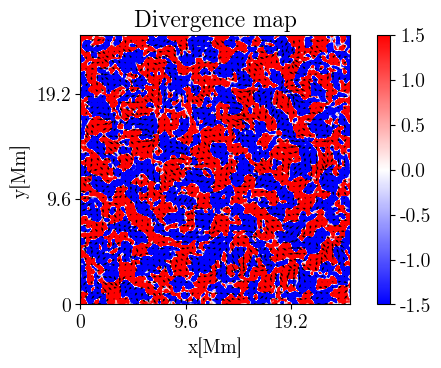

In [158]:
NY = len(Vy_600I_mean)
ymin = np.min(Vy_600I_mean)
ymax = np.max(Vy_600I_mean)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_600I_mean)
xmax = np.max(Vx_600I_mean)
dx = (xmax -xmin)/(NX-1.)

rows = 1
cols = 2

plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 1536
ymin = 0
ymax=  1536

Fx  = Vx_600I_mean
Fy  = Vy_600I_mean

F = [Fx, Fy]
h = [dx, dy]
g = divergence(F,h)
plt.title("Divergence map")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")     

Bgtx_disp = Vx_600I_mean[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_600I_mean[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 32


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im = plt.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
plt.xticks([0,600,1200], [0, 9.6, 19.2])
plt.yticks([0,600,1200], [0, 9.6, 19.2])
plt.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 6, headlength = 4)
plt.colorbar(im)